# Tinder sentiment analysis

In [31]:
import IPython.display
from IPython.display import Image

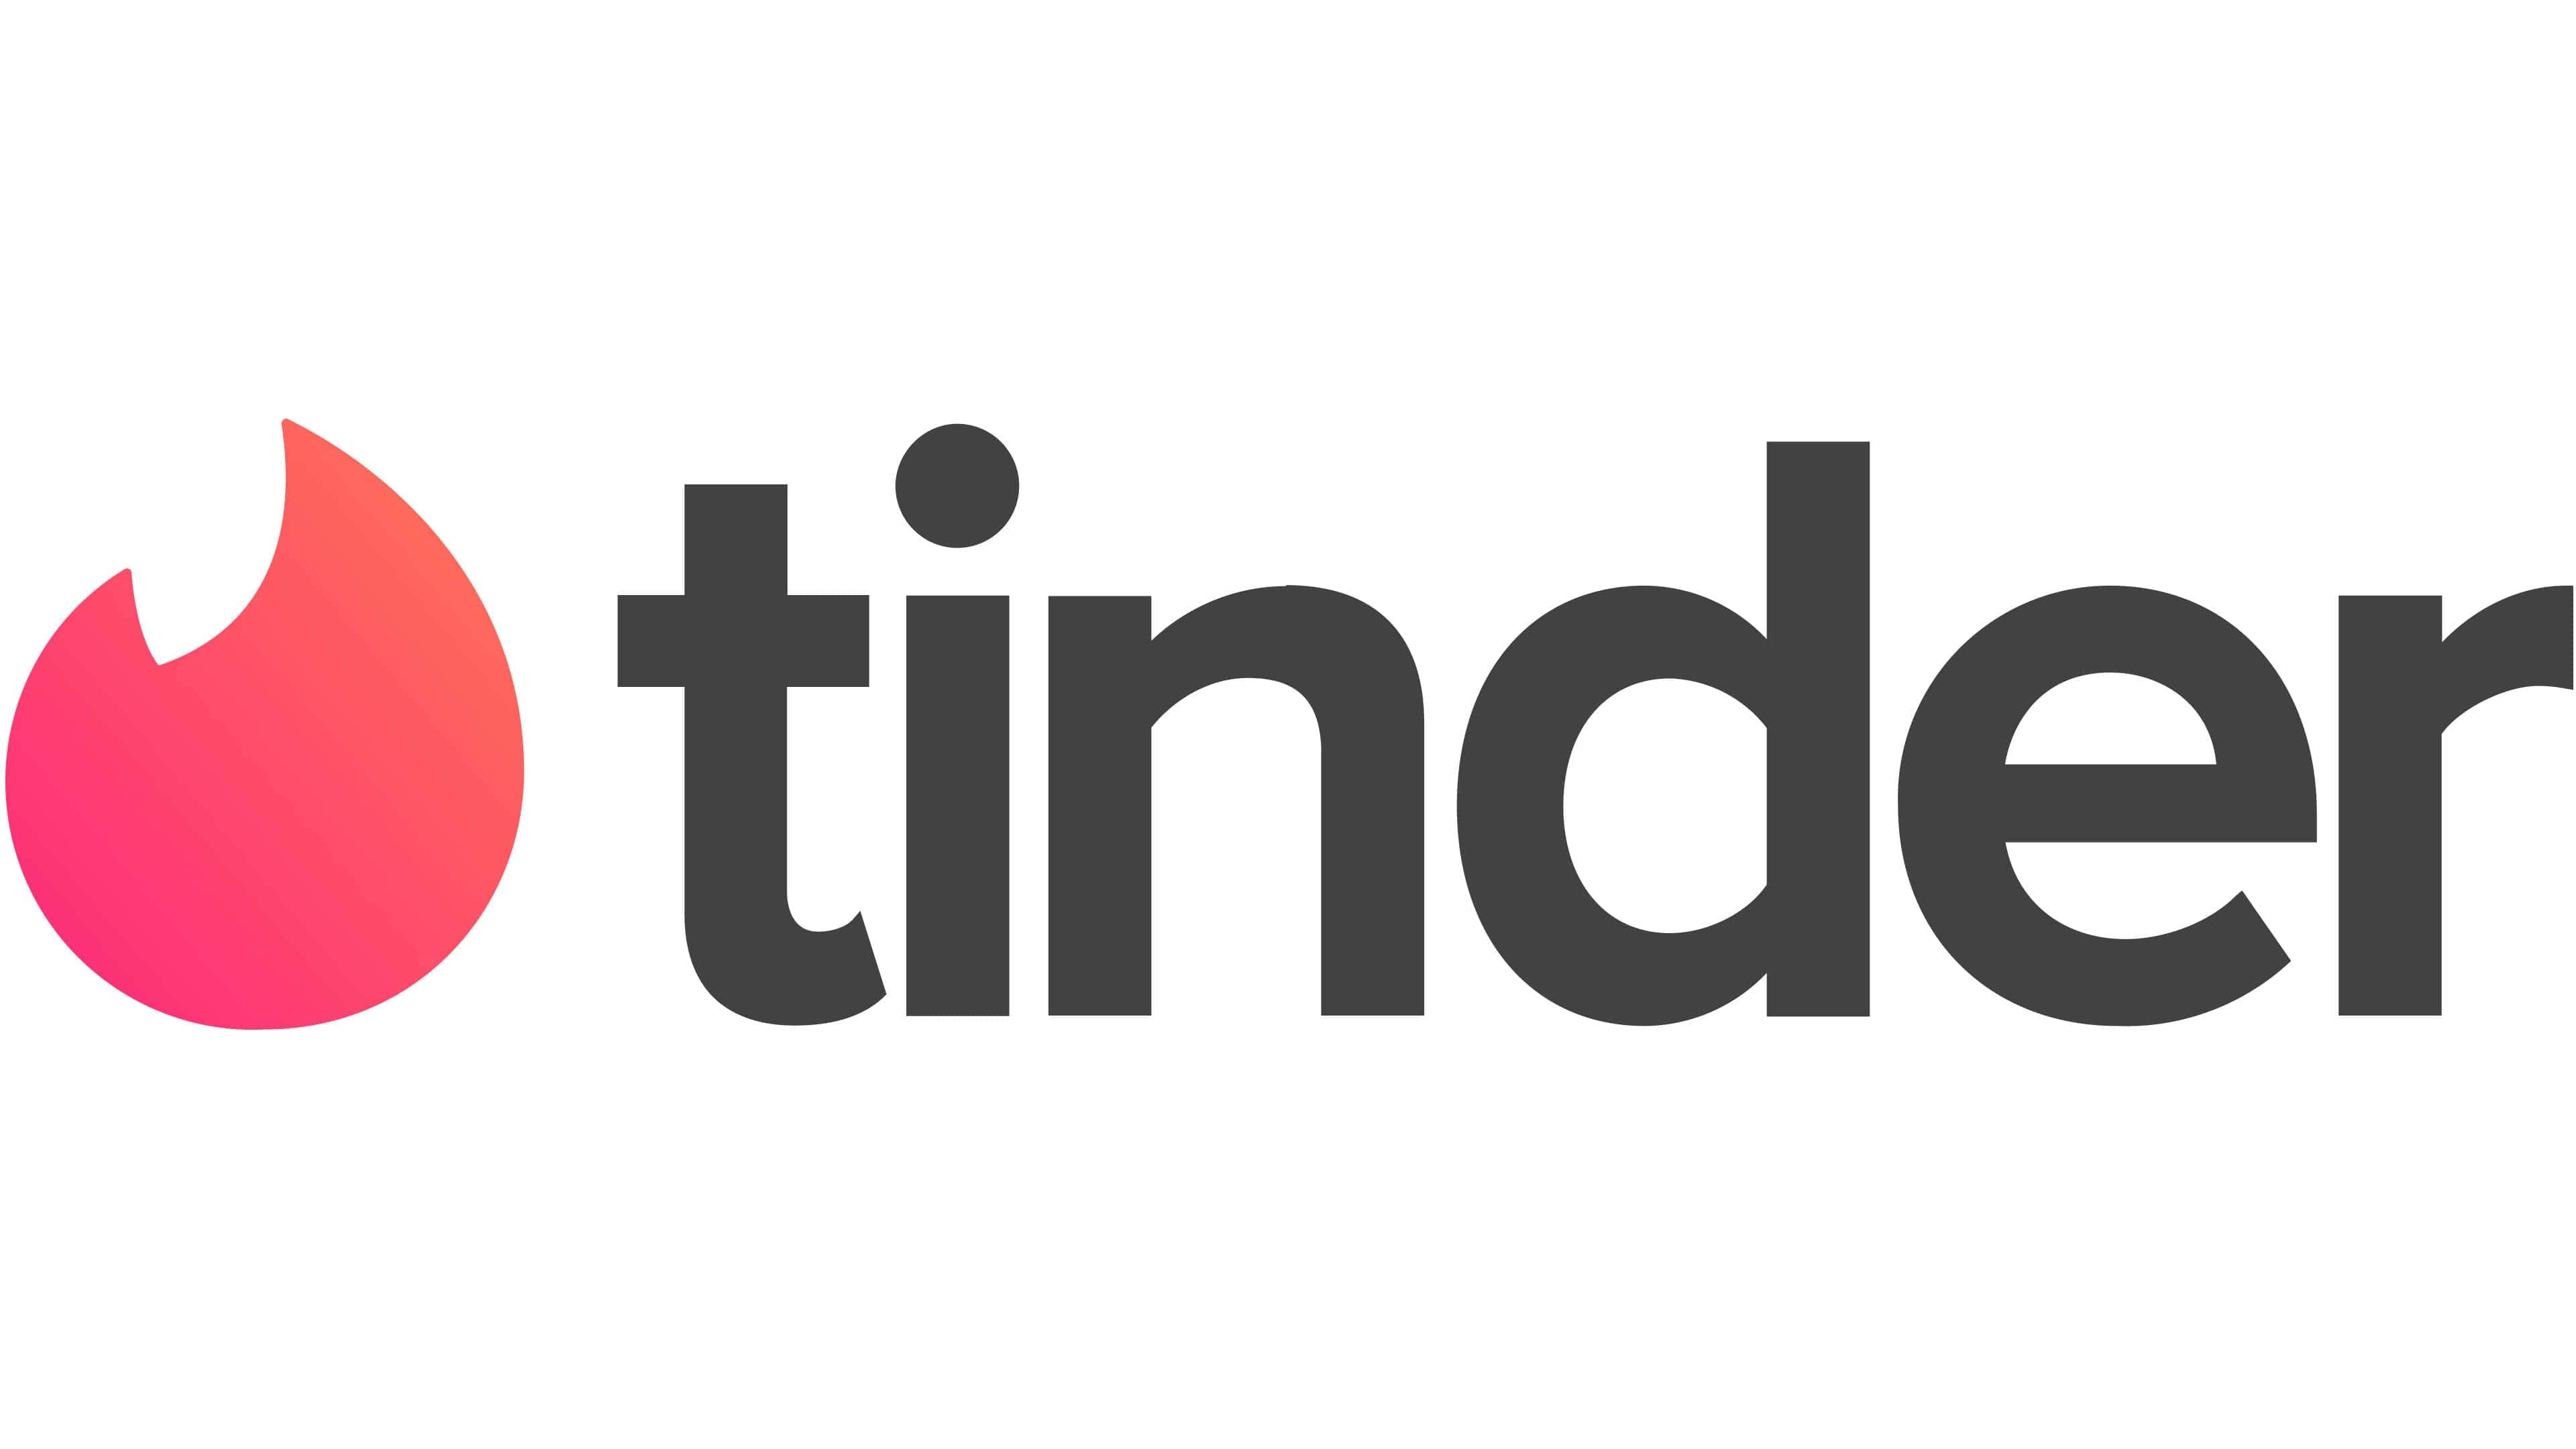

In [38]:
Image(r"C:\Users\DEVIL MAY CRY\Desktop\learning\python projects\github projects\Tinder sentiment analysis\Tinder-Logo-2017-present.jpg"
     )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

In [2]:
df = pd.read_csv(r"C:\Users\DEVIL MAY CRY\Desktop\learning\python projects\github projects\Tinder sentiment analysis\tinder_google_play_reviews.csv")

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,10f404a6-9b12-4646-b45a-00d5e37356aa,Quinten O'shea,https://play-lh.googleusercontent.com/a-/AFdZu...,Works great love it,5,0,13.12.0,2022-07-23 02:27:00,NaN,NaN
1,95525074-57e9-45cf-9723-ae41f3da4a0c,lizzy Hurst,https://play-lh.googleusercontent.com/a-/AFdZu...,Loved the app but was banned for no reason.?,1,0,NaN,2022-07-23 02:18:52,NaN,NaN
2,3f57ccf3-3311-4a33-908e-9783071f9bd1,Readyredwolff,https://play-lh.googleusercontent.com/a-/AFdZu...,Can't connect my Spotify account because it ke...,2,0,13.12.0,2022-07-23 01:56:33,NaN,NaN
3,fa0502f3-dff6-4296-b1e3-dcff5c60d236,a_hidden_one,https://play-lh.googleusercontent.com/a-/AFdZu...,super expensive. All of the membership fees ar...,1,0,NaN,2022-07-23 01:48:13,NaN,NaN
4,16a83fe4-f162-4ca1-9c5e-0bf242131bf2,Matt P,https://play-lh.googleusercontent.com/a/AItbvm...,Not worth upgrading. I literally like everyone...,2,0,13.12.0,2022-07-23 01:32:55,NaN,NaN


# To analyze sentiments we need only content column

In [5]:
data=df[['content']]

In [22]:
data.head()

,content,Positive,Negative,Neutral
0,work great love,0.892,0.000,0.108
1,love app ban reason,0.429,0.367,0.204
2,cant connect spotifi account keep tell havent ...,0.000,0.238,0.762
3,super expens membership fee realli expens take...,0.432,0.095,0.473
4,worth upgrad liter like everyon test made diff...,0.418,0.000,0.582


In [7]:
#checking null values
data.isnull().sum()

content    1342
dtype: int64

In [10]:
#remove null values
df=df.dropna()

# Data Preprocessing
Now let’s prepare this data for the task of sentiment analysis. Here we have to clean the text in the content column:

In [10]:
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer('english')
stopword=set(stopwords.words('english'))

def clean(text):
    text=str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

data['content']=data['content'].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\DEVIL MAY
[nltk_data]     CRY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\DEVILM~1\AppData\Local\Temp/ipykernel_30304/3209442286.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['content']=data['content'].apply(clean)


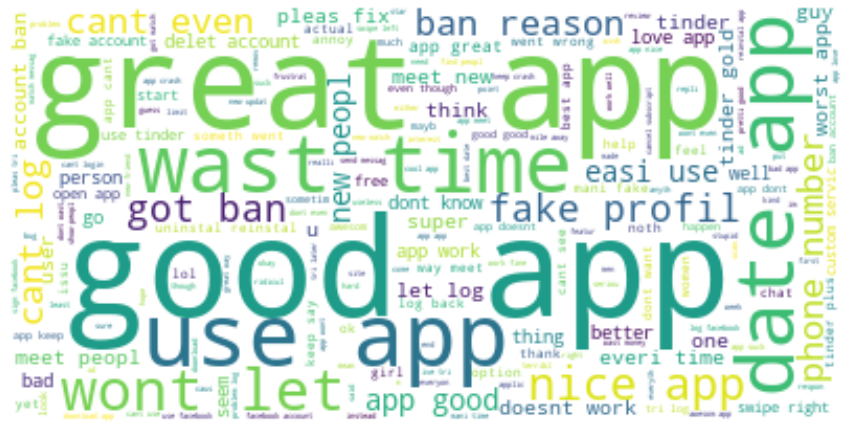

In [14]:
text=' '.join(i for i in data.content)
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\DEVIL MAY
[nltk_data]     CRY\AppData\Roaming\nltk_data...
C:\Users\DEVILM~1\AppData\Local\Temp/ipykernel_30304/3699756414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
C:\Users\DEVILM~1\AppData\Local\Temp/ipykernel_30304/3699756414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"

                                             content  Positive  Negative  \
0                                    work great love     0.892     0.000   
1                                love app ban reason     0.429     0.367   
2  cant connect spotifi account keep tell havent ...     0.000     0.238   
3  super expens membership fee realli expens take...     0.432     0.095   
4  worth upgrad liter like everyon test made diff...     0.418     0.000   

   Neutral  
0    0.108  
1    0.204  
2    0.762  
3    0.473  
4    0.582  


C:\Users\DEVILM~1\AppData\Local\Temp/ipykernel_30304/3699756414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]


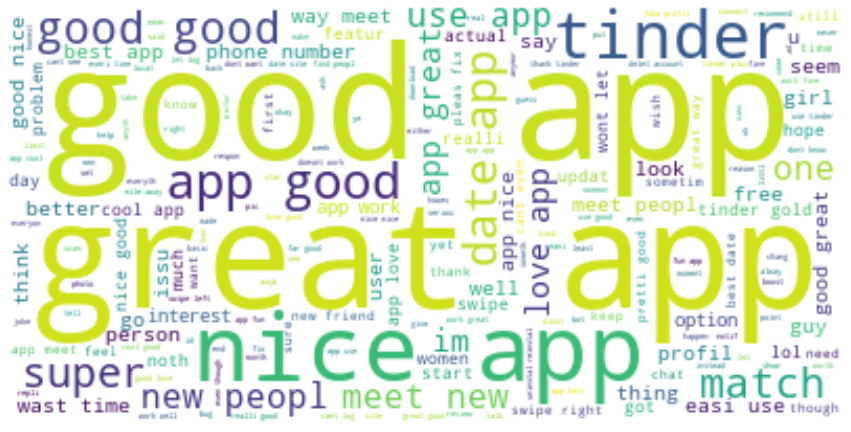

In [16]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

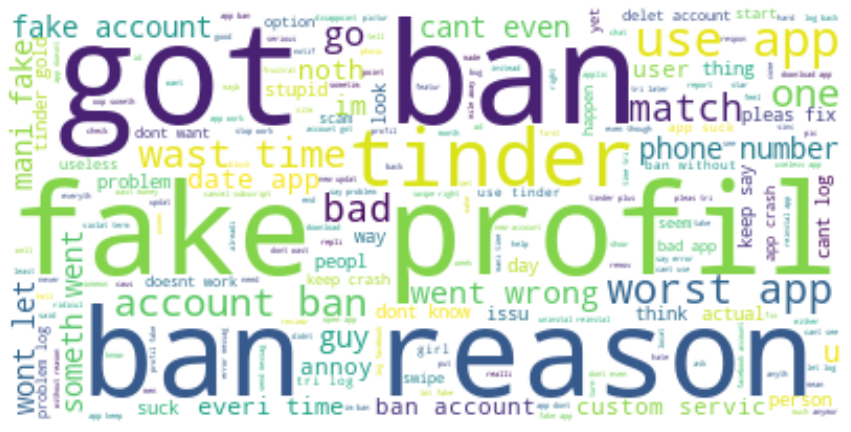

In [17]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [19]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  160025.65100002676
Negative:  60832.540999999306
Neutral:  320218.7509999683


# conclusion
Positive: 29.647%
Negative: 11.267%
Neutral: 59.086%
it looks like most people who reviewed Tinder had no strong feelings either way (59.086%), but there were more positive reviews (29.647%) than negative ones (11.267%).

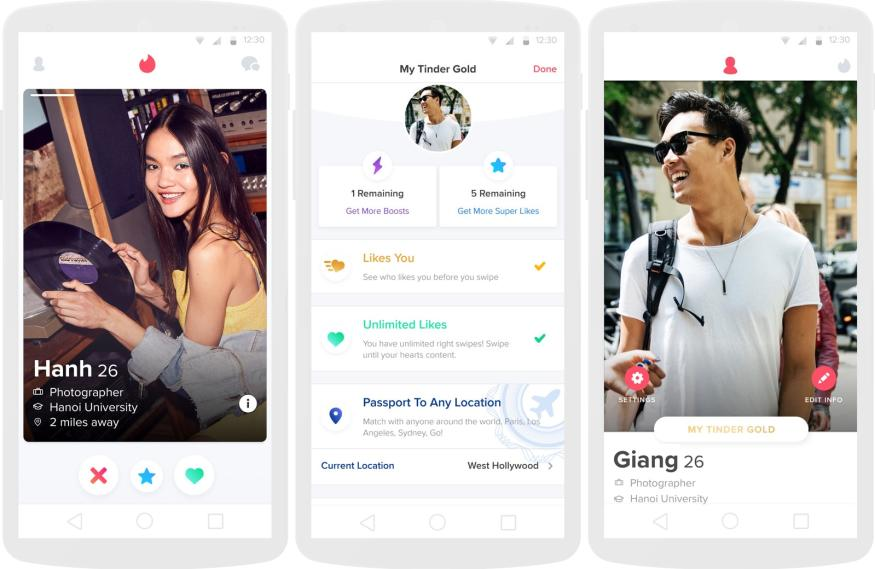

In [35]:
Image(r"C:\Users\DEVIL MAY CRY\Desktop\learning\python projects\github projects\Tinder sentiment analysis\dims.jpg")